In [1]:
# Logistic_Regression_customer_churn_classification_sklearn_32.ipynb
# File name: Bank Customer Churn Prediction
# File source: kaggle

# Cell No. 1

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import auc, roc_curve

# Load the Bank Customer Churn Prediction dataset
# Independent features: customer_id, credit_score, country, gender, age, 
# tenure, balance, products_number, credit_card, 
# active_member, estimated_salary
# n denotes number of input/independent features

data = pd.read_csv('Bank Customer Churn Prediction.csv')
print("\nThe first five rows of the dataset:")
print(data.head())

print("\nThe total number of features in the dataset:", data.shape[1])
print("\nThe column titles (feature names) of the dataset:\n")
print(data.columns)

# Dependent feature: churn, 
# churn is 1 if the client has left the bank and 0 if the client has not


The first five rows of the dataset:
   customer_id  credit_score country  gender  age  tenure    balance  \
0     15634602           619  France  Female   42       2       0.00   
1     15647311           608   Spain  Female   41       1   83807.86   
2     15619304           502  France  Female   42       8  159660.80   
3     15701354           699  France  Female   39       1       0.00   
4     15737888           850   Spain  Female   43       2  125510.82   

   products_number  credit_card  active_member  estimated_salary  churn  
0                1            1              1         101348.88      1  
1                1            0              1         112542.58      0  
2                3            1              0         113931.57      1  
3                2            0              0          93826.63      0  
4                1            1              1          79084.10      0  

The total number of features in the dataset: 12

The column titles (feature names) of

In [2]:
# Cell No. 2

# Convert the categorical attributes' values into numeric values
encoder = LabelEncoder()
data['country'] = encoder.fit_transform(data['country'])
data['gender'] = encoder.fit_transform(data['gender'])

# Drop the customer id column
data.drop('customer_id', axis=1, inplace=True)
data.head()

# Get the independent (input) and dependent (output) features
X = data.drop(columns=['churn'])
y = data['churn']

# Split the dataset into training and testing sets
test_set_ratio = 0.2
X_train, X_test, Y_train, Y_test = train_test_split(X, y,
                        test_size=test_set_ratio, random_state=42)

# Convert the Pandas objects (dataframes & series) to Numpy arrays
x_train = X_train.to_numpy()
x_test = X_test.to_numpy()
y_train = Y_train.to_numpy()
y_test = Y_test.to_numpy()

# Normalize the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

print("Total number of instances in the dataset:", data.shape[0])
print("Total number of training instances:", x_train.shape[0])
print("Total number of test instances:", x_test.shape[0])

Total number of instances in the dataset: 10000
Total number of training instances: 8000
Total number of test instances: 2000


In [3]:
# Cell No. 3

#Use sk-learn's LogisticRegression for model tarining and prediction making

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

# Prediction for the train and test sets
# Output array of predict() here is 1D of the form (n,)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

#Probability estimates for the train and test sets
y_pred_train_prob = model.predict_proba(X_train)
y_pred_test_prob = model.predict_proba(X_test)

# Obtain and print model parameters
w = model.coef_
b = model.intercept_
print('\nModel parameters (using GD): \nSlope =', w, '\nIntercept =', b)


Model parameters (using GD): 
Slope = [[-4.98872025e-03  3.39183037e-04 -1.02677839e-03  4.35793882e-02
  -1.53617550e-03  3.66205701e-06 -4.58507762e-04 -1.79491537e-04
  -1.39275942e-03 -1.41467930e-06]] 
Intercept = [-0.00018187]


In [4]:
# Cell No. 4

# Calculate accuracy_score for evalutaion of the model on the train & test sets
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print('Training accuracy:', train_accuracy)
print('Testing accuracy:', test_accuracy)

# Compute confusion matrix for the test set
cnf_matrix = confusion_matrix(y_test, y_pred_test)
print('confusion matrix\n', cnf_matrix)

Training accuracy: 0.78725
Testing accuracy: 0.8005
confusion matrix
 [[1573   34]
 [ 365   28]]


In [5]:
#Cell no. 05

# Compare the predicted and target values for the test set

from tabulate import tabulate

# Create a list of tuples with true and predicted values
compare = [(y_t, y_p) for y_t, y_p in zip(y_test[61:71], y_pred_test[61:71])]

# Define the column headings for the comparison table
headers = ["True Value", "Predicted Value"]

# Print the comparison table
print(tabulate(compare, headers, tablefmt = "grid", 
               numalign = "center"))

+--------------+-------------------+
|  True Value  |  Predicted Value  |
+==============+===================+
|      0       |         0         |
+--------------+-------------------+
|      0       |         0         |
+--------------+-------------------+
|      0       |         0         |
+--------------+-------------------+
|      0       |         0         |
+--------------+-------------------+
|      0       |         0         |
+--------------+-------------------+
|      0       |         0         |
+--------------+-------------------+
|      0       |         0         |
+--------------+-------------------+
|      1       |         0         |
+--------------+-------------------+
|      0       |         0         |
+--------------+-------------------+
|      0       |         0         |
+--------------+-------------------+


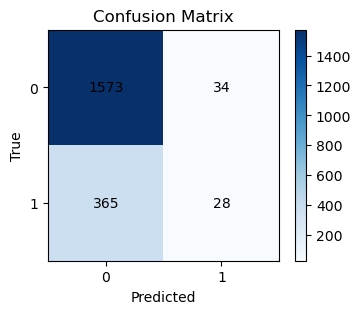

In [6]:
# Create a figure for the confusion matrix plot
plt.figure(figsize=(4, 3))

# Plot the confusion matrix as a heatmap
plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Label the axes
classes = np.unique(y_test)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

# Add labels for the axes
plt.xlabel('Predicted')
plt.ylabel('True')

# Add the values inside the heatmap
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(cnf_matrix[i, j]), horizontalalignment='center', verticalalignment='center')

# Show the plot
plt.show()

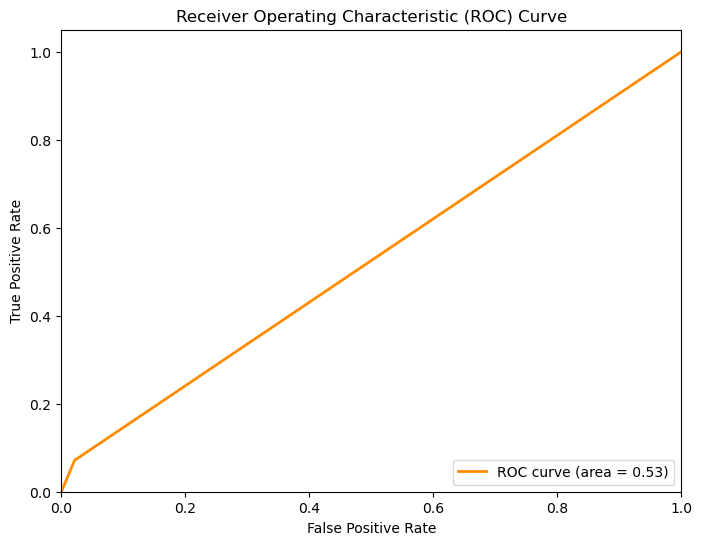

In [7]:
fpr, tpr, _ = roc_curve(y_test, y_pred_test)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()